In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os
import matplotlib.colors 

In [4]:
inlet_x=-0.5
outlet_x=1.1

# Load data

In [5]:
cd ~/HPT_500k/HPT_LS05_DOM30_TI5/convergence/

/mnt/drive2/re_500k/HPT_LS05_DOM30_TI5/convergence


In [6]:
cases=[]
labels=[]
convergencedir='./'
# now find all the stat-files and set the labels
dt=2.3*1.0e-05
root, dirs, files=next(os.walk(convergencedir))
for d in dirs:
#                self.filelist.append(os.getcwd()+'/'+convergencedir+'/'+d+'/STAT_cont.bin')
    cases.append(convergencedir+'/'+d+'/')
    temp=d.split('_')
    labels.append('%.2f - %.2f'%(float(temp[0])*dt,float(temp[2])*dt))
n_c=len(cases)
print cases
print labels

['.//5095101_to_5515101/', './/4555101_to_4615101/', './/4645101_to_5515101/']
['117.19 - 126.85', '104.77 - 106.15', '106.84 - 126.85']


In [7]:
cascades=[]
for i in range(n_c):
    filen=cases[i]+'/STAT_cont'
    cascades.append(l.cascade_mean(inlet_x,outlet_x,filename=filen,infile='../cascade3d.in',Refplane='Outlet',chord=1.74
                                  ,HeatTransfer=True,label=labels[i]))

reading inlet and outlet
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
reading data from file previously extracted
['xp', 'ym', 'yp']
['xp', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'xp', 'ym', 'yp']
['xm', 'ym', 'yp']
['xp', 'ym', 'yp']
['xp', 'ym', 'yp']
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
reading data from file previously extracted
['xp', 'ym', 'yp']
['xp', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'xp', 'ym', 'yp']
['xm', 'ym', 'yp']
['xp', 'ym', 'yp']
['xp', 'ym', 'yp']
198
reading blade
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
['xp', 'ym', 'yp']
['xp', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'ym', 'yp']
['xm', 'xp', 'ym', 'yp']
['xm', 'ym', 'yp']
['xp', 'ym', 'yp']
['xp', 'ym', 'yp']
3 i= 2

In [8]:
cascades[-1].report_integral_mixed_out()

Isentropic Reynolds Number:    536851.51395
Isentropic Mach Number:    0.9169384531
Isentropic Reynolds Number:    544687.95985 (inlet mass averaged)
Isentropic Mach Number:    0.9169364095 (inlet mass averaged)
Isentropic exit Velocity:    5.6453365056
Mixed out loss    0.0344470976
Inlet angle:   -0.0006867656
Inlet Mach number:    0.1484150893
Inlet stagnation pressure:   33.0149637726
Inlet stagnation Temperature:    1.8239660953
Inlet static pressure:   32.5109138305
Inlet static Temperature:    1.8159660245
Outlet angle:  -75.0267994595
Outlet Mach number:    0.9036212903
Outlet stagnation pressure:   32.5377968016
Outlet stagnation Temperature:    1.8161882281
Outlet static pressure:   19.1627961235
Outlet static Temperature:    1.5612296160
Outlet density:    0.6873535116


In [9]:
for i in range(3):
    cascades[i].report_integral_mixed_out()

Isentropic Reynolds Number:    536863.27975
Isentropic Mach Number:    0.9169650699
Isentropic Reynolds Number:    544694.04141 (inlet mass averaged)
Isentropic Mach Number:    0.9169630476 (inlet mass averaged)
Isentropic exit Velocity:    5.6455278413
Mixed out loss    0.0344234618
Inlet angle:   -0.0007570865
Inlet Mach number:    0.1484174559
Inlet stagnation pressure:   33.0149189710
Inlet stagnation Temperature:    1.8239618893
Inlet static pressure:   32.5108537962
Inlet static Temperature:    1.8159615830
Outlet angle:  -75.0270149968
Outlet Mach number:    0.9036568946
Outlet stagnation pressure:   32.5380607591
Outlet stagnation Temperature:    1.8161883097
Outlet static pressure:   19.1622096143
Outlet static Temperature:    1.5612124148
Outlet density:    0.6873400469
Isentropic Reynolds Number:    536343.88887
Isentropic Mach Number:    0.9172019086
Isentropic Reynolds Number:    544662.54701 (inlet mass averaged)
Isentropic Mach Number:    0.9171995189 (inlet mass average

In [10]:
print cascades[0].inlet.rho_mix_out

1.00255862158


In [11]:
pt_exp_in=90900.
ps_stat_out=52200.
tt_in=402.60
ma_is=np.sqrt(((pt_exp_in/ps_stat_out)**(0.4/1.4)-1)*2/0.4)
t_is=tt_in*(1+0.2*ma_is**2)**(-1)
a_is=np.sqrt(1.4*287.*t_is)
u_is=ma_is*a_is
rho_is=ps_stat_out/287./t_is
chord=0.067647
mu_is=1.512041288*10**(-6)*(t_is)**1.5/(t_is+120)
print mu_is
re_is_exp=chord*u_is/mu_is*rho_is
print re_is_exp

2.07728150085e-05
593510.404078


In [12]:
# set the following four parameters to adjust Reynolds number and Mach number independently
pt_exp_in=89600.
ps_stat_out=52000.
tt_in=430.
chord=0.067647 # this is the chord they used in the experiment


# the section below computes mach and Reynolds number 
print '%4s %30s %30s'% (' ','target', 'specified combination')
ma_is=np.sqrt(((pt_exp_in/ps_stat_out)**(0.4/1.4)-1)*2/0.4)
print '%4s %30.5f %30.5f'%('Ma',0.917,ma_is)
t_is=tt_in*(1+0.2*ma_is**2)**(-1)
a_is=np.sqrt(1.4*287.*t_is)
u_is=ma_is*a_is
rho_is=ps_stat_out/287./t_is

mu_is=1.512041288*10**(-6)*(t_is)**1.5/(t_is+120)
re_is_exp=chord*u_is/mu_is*rho_is
print '%4s %30.0f %30.0f'%('Re',536851,re_is_exp)

                             target          specified combination
  Ma                        0.91700                        0.91705
  Re                         536851                         536781


<IPython.core.display.Javascript object>


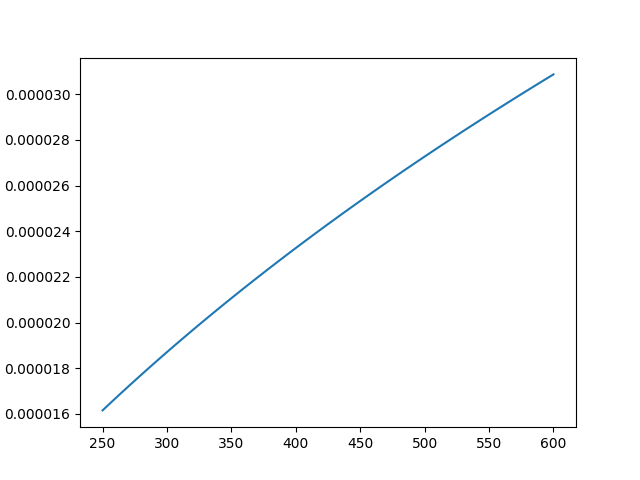

In [13]:
t_test=np.linspace(250.,600.,num=50)
mu_test=1.512041288*10**(-6)*(t_test)**1.5/(t_test+120)
plt.figure()
plt.plot(t_test,mu_test)

# Plot cascade quantities

## Inlet profiles

<IPython.core.display.Javascript object>


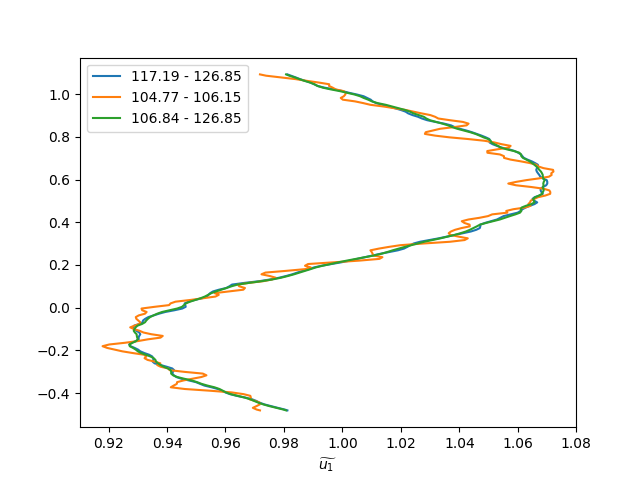

<IPython.core.display.Javascript object>


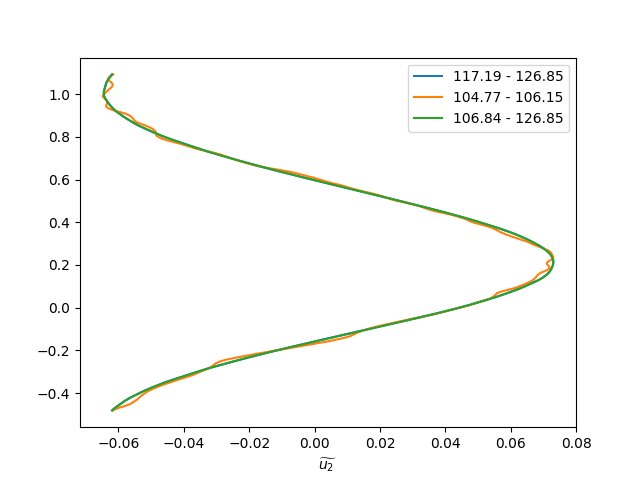

<IPython.core.display.Javascript object>


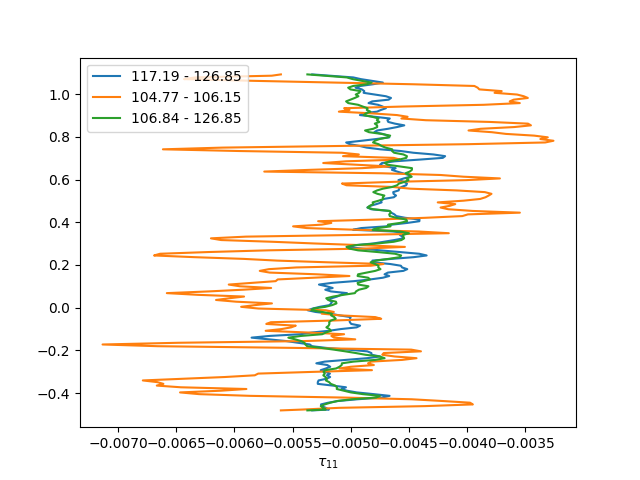

<IPython.core.display.Javascript object>


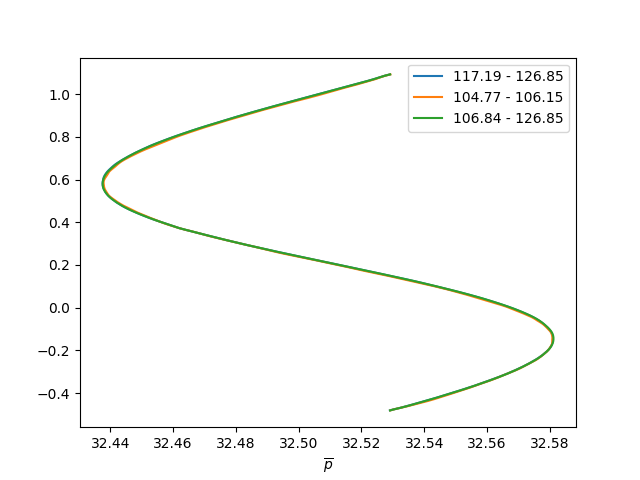

In [14]:
ids=[]
ids.append(cascades[0].header.get_index(101,2))
ids.append(cascades[0].header.get_index(101,3))
ids.append(cascades[0].header.get_index(101,10))
ids.append(cascades[0].header.get_index(101,5))
for i,val in enumerate(ids):
    plt.figure()
    for j in range(n_c):
        plt.plot(cascades[j].inlet.data[:,val],cascades[j].inlet.data[:,1],label=cascades[j].label)
    plt.legend()
    plt.xlabel(cascades[j].header.vars[val])

In [15]:
inlet_stream=l.lines(convergence=True,convergencedir='./')

In [16]:
inlet_stream.extr_line([-1.0,0.0],[-0.2,0.0],300)

number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
reading data from file previously extracted
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
reading data from file previously extracted
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
reading data from file previously extracted


<IPython.core.display.Javascript object>


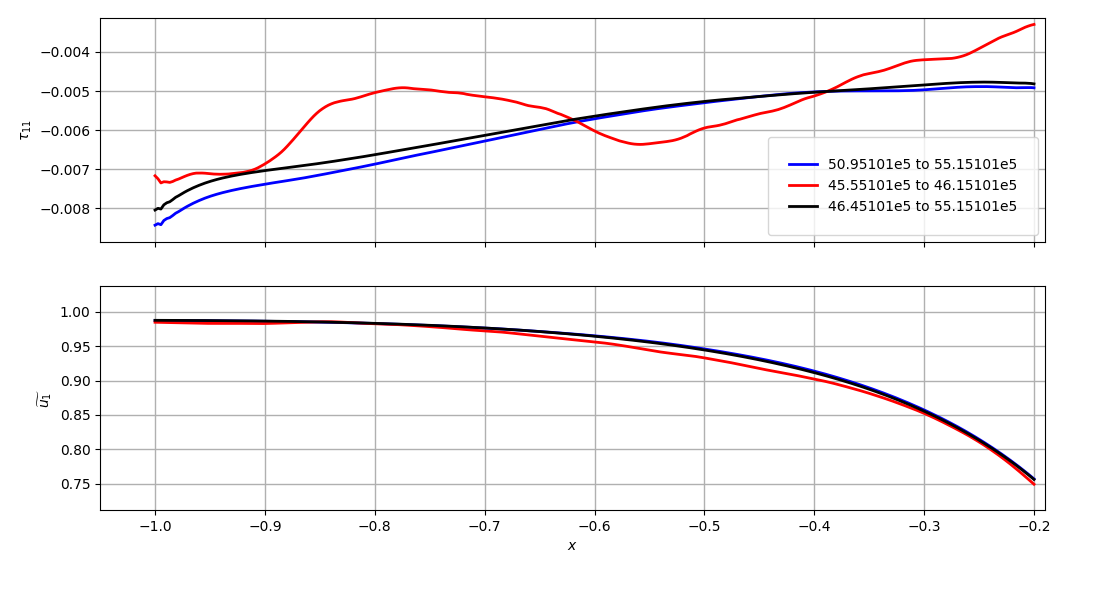

<IPython.core.display.Javascript object>


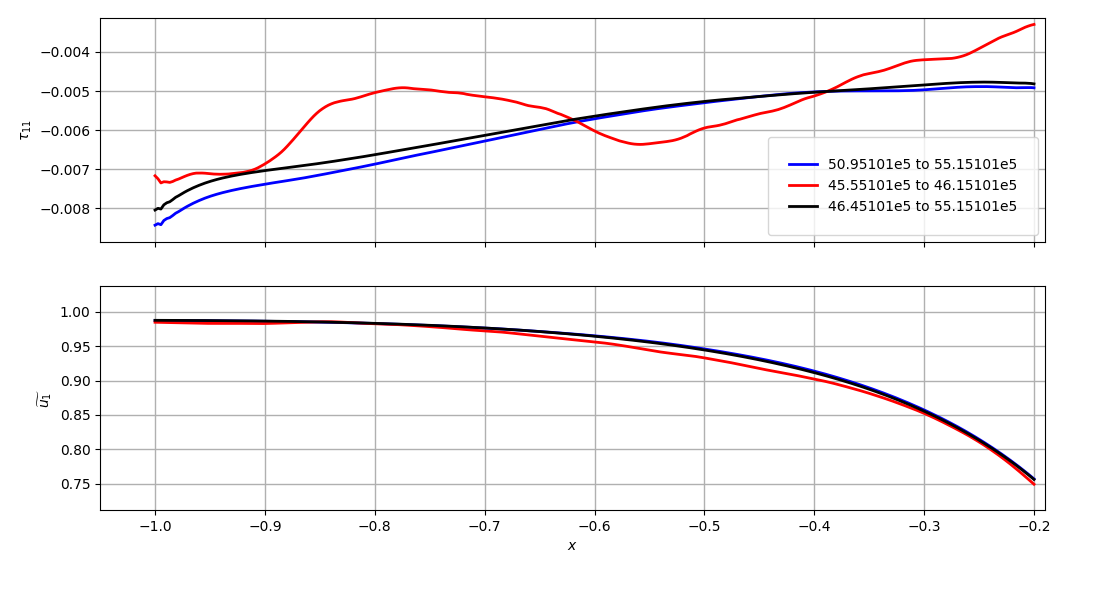

In [17]:
pl_var=[]
pl_var.append(inlet_stream.l[0].var.get_index(101,10))
pl_var.append(inlet_stream.l[0].var.get_index(101,2))
inlet_stream.plot_var([0],pl_var)

# Blade Profiles

<IPython.core.display.Javascript object>


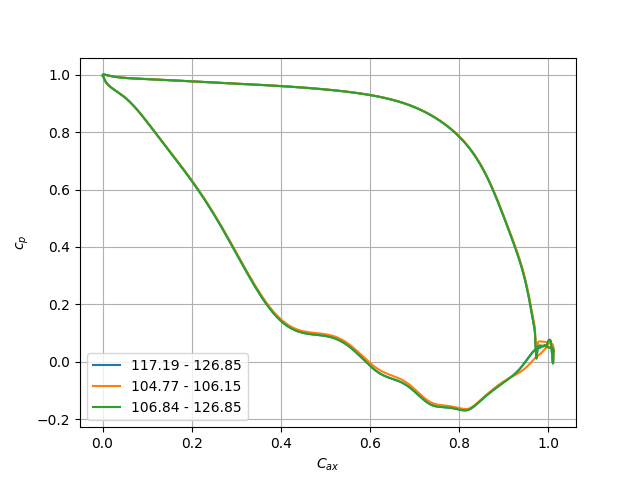

In [18]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.data[:,0],cascades[i].cp,label=cascades[i].label)
plt.grid()
plt.legend()
plt.xlabel('$C_{ax}$')
plt.ylabel('$c_p$')

<IPython.core.display.Javascript object>


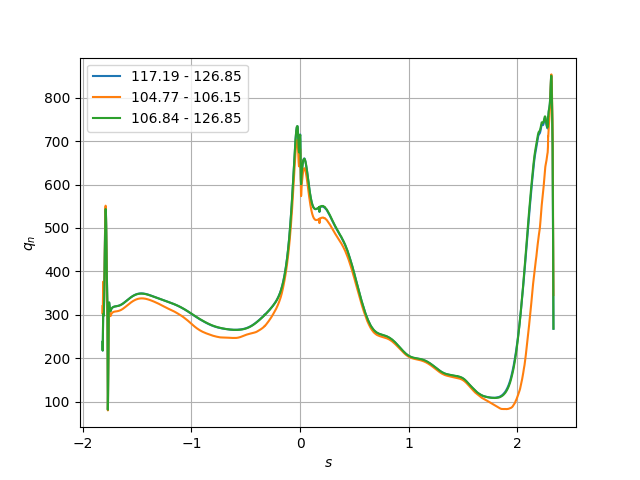

In [20]:
plt.figure()
for i in range(n_c):
    #plt.plot(cascades[i].blade.dist[:],cascades[i].qnorm2,label=cascades[i].label) 
    plt.plot(cascades[i].blade.dist[:],cascades[i].blade.qnorm_new,label=cascades[i].label)     
plt.grid()
plt.legend()
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')

<IPython.core.display.Javascript object>


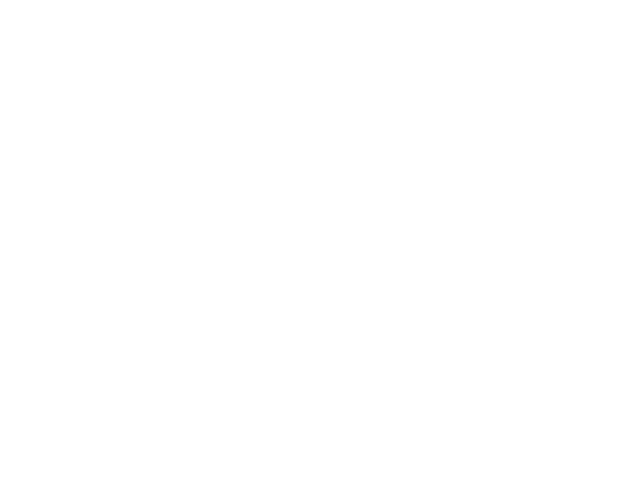

AttributeError: 'cascade_mean' object has no attribute 'dTdy'

In [21]:
plt.figure()
mu_ind=cascades[0].blade.var.get_index(101,6)
for i in range(1):
    plt.plot(cascades[i].blade.dist[:],cascades[i].dTdy,label=cascades[i].label) 
    plt.plot(cascades[i].blade.dist[:],-cascades[i].blade.dTdn,label=cascades[i].label)     
plt.grid()
plt.legend()
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')

## Outlet region

<IPython.core.display.Javascript object>


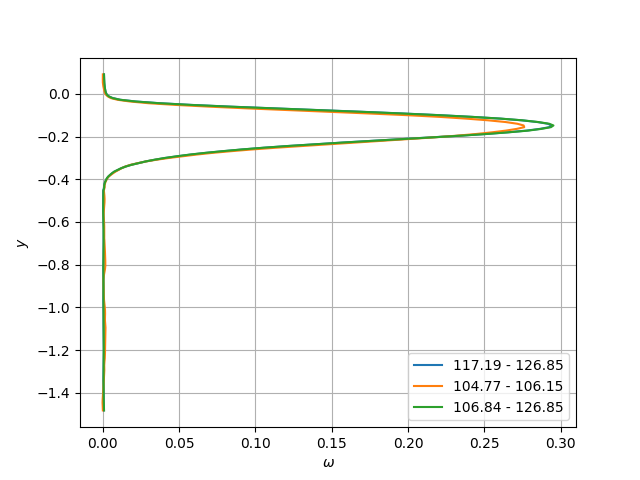

In [22]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].loss_mix[:],cascades[i].outlet.data[:,1],label=cascades[i].label)
plt.grid()
plt.legend(loc=0)
plt.xlabel('$\omega$')
plt.ylabel('$y$')

# Boundary Layer Profiles

In [ ]:
cascades[-1].extr_bl_quantities(nps_stream=100,nps_wall_norm=200,extent=0.05,f_ss_start=0.05,f_ss_end=0.95
                           ,f_ps_start=0.02,f_ps_end=0.98)

Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file in CGNS format
number of groups and ids 4 [100, 101, 102, 106]
Reading file

In [18]:
import planes

In [19]:
domain=planes.plane()
domain.read_data('5215101_to_5485101/STAT_cont.bin')

TypeError: read_data() takes exactly 3 arguments (2 given)

In [ ]:
plt.figure()
plt.axis(aspect='equal')

for ib in range(9):
    plt.plot(domain.grid[ib][:,0,0],domain.grid[ib][:,0,1],'k')
    plt.plot(domain.grid[ib][:,-1,0],domain.grid[ib][:,-1,1],'k')   
    plt.plot(domain.grid[ib][0,:,0],domain.grid[ib][0,:,1],'k')
    plt.plot(domain.grid[ib][-1,:,0],domain.grid[ib][-1,:,1],'k')        
plt.plot(cascades[-1].blade.data[:,0],cascades[-1].blade.data[:,1])
for j in range(0,100,10):
    plt.plot(cascades[-1].vel_profs_ss[j].data[:,0],cascades[-1].vel_profs_ss[j].data[:,1],'k')
    plt.text(cascades[-1].vel_profs_ss[j].data[-1,0],cascades[-1].vel_profs_ss[j].data[-1,1],'%6.3f'%(cascades[-1].bl_ss_wall_norm[2,0,j]-0.05))
plt.plot(cascades[-1].vel_profs_ss[-1].data[:,0],cascades[-1].vel_profs_ss[-1].data[:,1],'k')
plt.text(cascades[-1].vel_profs_ss[-1].data[-1,0],cascades[-1].vel_profs_ss[-1].data[-1,1],'%6.3f'%(cascades[-1].bl_ss_wall_norm[2,0,-1]-0.05))
for j in range(0,100,10):
    plt.plot(cascades[-1].vel_profs_ps[j].data[:,0],cascades[-1].vel_profs_ps[j].data[:,1],'k')
    plt.text(cascades[-1].vel_profs_ps[j].data[-1,0],cascades[-1].vel_profs_ps[j].data[-1,1],'%6.3f'%(cascades[-1].bl_ps_wall_norm[2,0,j]-0.05))
plt.plot(cascades[-1].vel_profs_ps[-1].data[:,0],cascades[-1].vel_profs_ps[-1].data[:,1],'k')
plt.text(cascades[-1].vel_profs_ps[-1].data[-1,0],cascades[-1].vel_profs_ps[-1].data[-1,1],'%6.3f'%(cascades[-1].bl_ps_wall_norm[2,0,-1]-0.05))
    

In [ ]:
pl_var=cascades[-1].bl_ss_wall_norm
plt.figure()
levs=np.logspace(-5,0,num=11)
norml = matplotlib.colors.BoundaryNorm(levs, 256)
plt.contourf(pl_var[2,:,:],pl_var[1,:,:],-pl_var[5,:,:],cmap=plt.cm.jet,levels=levs,norm=norml)
plt.colorbar()

In [ ]:
cascades[-1].report_integral_mixed_out()

In [ ]:
l.cascade_mean.report_integral_mixed_out

In [ ]:
cascades[-1].inlet.c_mix_out

In [ ]:
print max(cascades[-1].blade.data[:,0])